# Machine Learning Talks
## 3rd - Deep Learning Image Multiclassifier Basics


This notebook was developed by André Miranda for the Cleverti's Machine Learning Talks.

In this notebook I take the famous MNIST Dataset and implement a simple but powerfull Convolutional Neural Network, with 99% Test Acc. and with the ability to be used in applications outside the MNIST Dataset.

I used the Keras library to develop the NN.

The MNIST Dataset is a classical dataset in Computer Vision, made of handwritten digits. So, in this task I try to develop a Classifier to predict handwritten digits from 0 to 9.

A lot of the core ideas here came after I read "Deep Learning with Python" by François Chollet. A great book for those who want to learn Keras and Deep Learning, with Python.

In [1]:
# Imports
# For modelling
from keras.datasets import mnist  # the dataset
from keras.models import load_model  # for loading saved trained models
from keras.utils import to_categorical  # to encode the variables
from keras import layers, models
import numpy as np

# To plot
import matplotlib.pyplot as plt

# For handling images
import cv2

Using TensorFlow backend.


## The data

Each sample in the dataset is a 28x28 image with one colour channel. You can see an example below.

The data is splitted into 60000 train samples and 10000 test samples.

The classes are well balanced trough the dataset.

In [2]:
# Importing the data, already available in the Keras package
(train_images_total, train_labels_total), (test_images, test_labels) = mnist.load_data()


Digit Samples


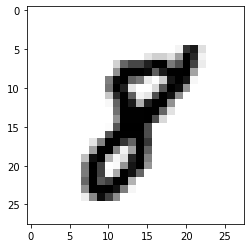

In [3]:
print('Digit Samples')
example = train_images_total[17]
plt.imshow(example, cmap=plt.cm.binary)

## Convnet Model

For the model's architecture I chose a Convolutional Neural Network.
The model is sequential, composed by 8 layers:
    - 2 pairs of Convolution + MaxPooling Layers
    - Convolution Layer
    - Flatten Layer, to reshape the data in 1 dimension
    - A Dense layer
    - Final Dense layer with ten final nodes, the same as the number of classes in our problem
    
For the activation function in the layers I used relu, except in the last one where I used the softmax to output the index for the max value in the predicitions. This will be our digit predicted.
I used RMSprop optimizer, a standard optimizer.
The Loss Function will be the Categorical Crossentropy, because we are dealing with a multiclassification problem.
I used Accuracy as performance metric because we have a balanced dataset.

I kept a validation set for tunning the model, that I first trained with 13 epochs.

In [4]:
# Data Processing
train_images_total = train_images_total.reshape((60000, 28, 28, 1)) # reshape to match NN input
train_images_total = train_images_total.astype('float32') / 255  # normalization of gray images
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels_total = to_categorical(train_labels_total)  # one hot encoding
test_labels = to_categorical(test_labels)

num_validation_samples = 12500
validation_data = train_images_total[: num_validation_samples]
validation_labels = train_labels_total[: num_validation_samples]
train_data = train_images_total[num_validation_samples :]

train_labels = train_labels_total[num_validation_samples :]

In [5]:
# Modelling
model = models.Sequential()
# Convolution NN part
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

# Classifier Part
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Tunning the model
model.compile(optimizer='rmsprop',  # a standard optimizer
              loss='categorical_crossentropy',  # the suitable for multiclass classifiers
              metrics=['accuracy'])  # suitable for a balanced dataset as the one we have
history = model.fit(train_data, train_labels, epochs=13, batch_size=512,
                    validation_data=[validation_data, validation_labels])
# Monitor the Loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']                      

W0624 11:45:15.088629 139687527520064 deprecation_wrapper.py:119] From /home/andre/Desktop/Cleverti/ML_talks/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0624 11:45:15.108518 139687527520064 deprecation_wrapper.py:119] From /home/andre/Desktop/Cleverti/ML_talks/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 11:45:15.111723 139687527520064 deprecation_wrapper.py:119] From /home/andre/Desktop/Cleverti/ML_talks/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0624 11:45:15.126440 139687527520064 deprecation_wrapper.py:119] From /home/andre/Desktop/Cleverti/ML_talks/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The 

Train on 47500 samples, validate on 12500 samples
Epoch 1/13
47500/47500 [==============================] - 13s 268us/step - loss: 0.6101 - acc: 0.8080 - val_loss: 0.1989 - val_acc: 0.9386
Epoch 2/13
47500/47500 [==============================] - 13s 278us/step - loss: 0.1548 - acc: 0.9529 - val_loss: 0.1907 - val_acc: 0.9398
Epoch 3/13
47500/47500 [==============================] - 14s 293us/step - loss: 0.0901 - acc: 0.9723 - val_loss: 0.0847 - val_acc: 0.9725
Epoch 4/13
47500/47500 [==============================] - 16s 336us/step - loss: 0.0640 - acc: 0.9798 - val_loss: 0.0585 - val_acc: 0.9829
Epoch 5/13
47500/47500 [==============================] - 14s 295us/step - loss: 0.0481 - acc: 0.9851 - val_loss: 0.0458 - val_acc: 0.9859
Epoch 6/13
47500/47500 [==============================] - 16s 343us/step - loss: 0.0385 - acc: 0.9880 - val_loss: 0.0545 - val_acc: 0.9837
Epoch 7/13
47500/47500 [==============================] - 15s 312us/step - loss: 0.0312 - acc: 0.9899 - val_loss: 0.

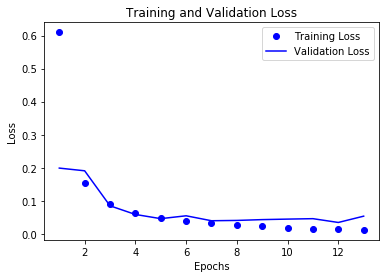

In [6]:
# Plotting the Performance on each epoch
epochs = range(1, 14)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Validation

We can see that the model starts to overfit in the training data after the 7th epoch, where the Validation Loss stabilizes.
So I'll train the final model in 7 epochs using the whole training data.

In [9]:
final_model = model
final_model.fit(train_images_total, train_labels_total, epochs=7, batch_size=512)
test_loss, test_acc = final_model.evaluate(test_images, test_labels)
print('Test Acc.: {0}%'.format(round(test_acc, 2) * 100))

final_model.save('mnist_final.h5')  # saving the model

Epoch 1/7
60000/60000 [==============================] - 15s 253us/step - loss: 0.0053 - acc: 0.9983
Epoch 2/7
60000/60000 [==============================] - 15s 257us/step - loss: 0.0049 - acc: 0.9987
Epoch 3/7
60000/60000 [==============================] - 15s 255us/step - loss: 0.0043 - acc: 0.9988
Epoch 4/7
60000/60000 [==============================] - 15s 250us/step - loss: 0.0041 - acc: 0.9988
Epoch 5/7
60000/60000 [==============================] - 15s 250us/step - loss: 0.0038 - acc: 0.9989
Epoch 6/7
60000/60000 [==============================] - 15s 253us/step - loss: 0.0041 - acc: 0.9987
Epoch 7/7
10000/10000 [==============================] - 1s 110us/step
Test Acc.: 99.0%


## Results

99% Accuracy is great, especially with such a few lines of code for modelling. Thanks Keras for that!

Now let's see if the model is good for classifying arbitrary data, for that we'll use a digit handwritten by ourselves.

Prediction: 5


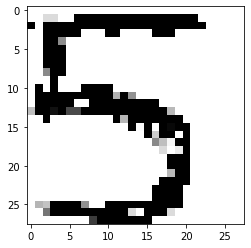

In [10]:
im_gray = cv2.imread('digit_test.png', cv2.IMREAD_GRAYSCALE)  # save an image with the name 'digit_test.png'

thresh = 127
im_bw = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]
im_bw = cv2.resize(im_bw, (28, 28))
im_bw = (255 - im_bw)
im_bw = im_bw.astype('float32') / 255
plt.imshow(im_bw, cmap=plt.cm.binary)
final_model = load_model('mnist_final.h5')
test_prediction = final_model.predict(im_bw.reshape(1,28,28,1))
digit_predicition = np.argmax(test_prediction)
print('Prediction: {0}'.format(digit_predicition))

## Great!

It works well, feel free to try it yourself!